# Rekurencyjne sieci neuronowe



[...]

## Warstwa rekurencyjna w pakiecie Keras

Proces, który zaimplementowaliśmy przy użyciu biblioteki Numpy, jest odpowiednikiem prostej warstwy o nazwie SimpleRNN pakietu Keras:

In [1]:
from keras.layers import SimpleRNN

2025-05-05 15:04:10.304270: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 15:04:10.513797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746450250.596235   10461 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746450250.618556   10461 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-05 15:04:10.841911: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Pomiędzy tymi implementacjami jest jednak pewna mała różnica: warstwa SimpleRNN dzieli sekwencje na wsady (operację taką wykonują wszystkie warstwy Keras) — nie przetwarza pojedynczych sekwencji tak, jak to miało miejsce w przykładzie zaimplementowanym za pomocą biblioteki Numpy. W związku z tym warstwa ta przyjmuje obiekty wejściowe o kształcie (rozmiar_wsadu, kroki_czasu, cechy_wejściowe) a nie (kroki_czasu, cechy_wejściowe).

Warstwa SimpleRNN, podobnie jak wszystkie rekurencyjne warstwy pakietu Keras, może być uruchomiona w dwóch trybach: może zwracać pełne sekwencje kolejnych obiektów wyjściowych dla każdego kroku czasu (trójwymiarowe tensory o kształcie (rozmiar_wsadu, kroki_czasu, cechy_wyjściowe)) lub tylko ostatnie obiekty wyjściowe poszczególnych sekwencji wejściowych (dwuwymiarowe tensory o kształcie (rozmiar_wsadu, cechy_wyjściowe)). Wybór trybu pracy jest dokonywany za pomocą argumentu return_sequences. Przeanalizujmy przykład, w którym zastosowano warstwę SimpleRNN, a dane wyjściowe są zwracane tylko podczas przetwarzania ostatniego kroku czasu:

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Input

model = Sequential()
model.add(Input(shape=(10000,)))
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 10000, 32)      │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,080 (1.23 MB)

 Trainable params: 322,080 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model = Sequential()
model.add(Input(shape=(10000,)))
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 10000, 32)      │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 10000, 32)      │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,080 (1.23 MB)

 Trainable params: 322,080 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Czasami warto utworzyć stos składający się z kilku warstw rekurencyjnych. Zwiększa to siłę tworzenia reprezentacji przez sieć. Przy takiej konfiguracji wszystkie warstwy pośrednie muszą zwracać pełną sekwencję obiektów wyjściowych:

In [9]:
model = Sequential()
model.add(Input(shape=(10000,)))
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # Ostatnia warstwa zwraca tylko ostatni obiekt wyjściowy.
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 10000, 32)      │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_13 (SimpleRNN)       │ (None, 10000, 32)      │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_14 (SimpleRNN)       │ (None, 10000, 32)      │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_15 (SimpleRNN)       │ (None, 10000, 32)      │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_16 (SimpleRNN)       │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,320 (1.25 MB)

 Trainable params: 328,320 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Teraz użyjmy takiego modelu w celu rozwiązania problemu klasyfikacji recenzji filmów. Zacznijmy od wstępnej obróbki danych:

In [10]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # Liczba słów traktowanych jako cechy.
maxlen = 500  # Ucina recenzje po tej liczbie słów należących do zbioru max_features słów najczęściej występujących w zbiorze.
batch_size = 32

print('Ładowanie danych...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'sekwencje treningowe')
print(len(input_test), 'sekwencje testowe')

print('Sekwencje (próbki x czas)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('Kształt obiektu input_train:', input_train.shape)
print('Kształt obiektu input_test:', input_test.shape)


Ładowanie danych...
25000 sekwencje treningowe
25000 sekwencje testowe
Sekwencje (próbki x czas)
Kształt obiektu input_train: (25000, 500)
Kształt obiektu input_test: (25000, 500)


In [13]:
input_train.shape

(25000, 500)

Przeprowadźmy proces trenowania prostej rekurencyjnej sieci przy użyciu warstwy Embedding i warstwy SimpleRNN.

In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Input(shape=(max_features,)))
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - acc: 0.6175 - loss: 0.6425 - val_acc: 0.6540 - val_loss: 0.6080
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - acc: 0.8049 - loss: 0.4359 - val_acc: 0.8166 - val_loss: 0.4173
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - acc: 0.8660 - loss: 0.3328 - val_acc: 0.8226 - val_loss: 0.4000
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - acc: 0.8953 - loss: 0.2712 - val_acc: 0.8466 - val_loss: 0.3816
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - acc: 0.9080 - loss: 0.2360 - val_acc: 0.8286 - val_loss: 0.3742
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - acc: 0.9297 - loss: 0.1890 - val_acc: 0.8118 - val_loss: 0.4800
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - acc: 0.9375 - loss: 0.1702 - val_acc: 0.8370 - val_loss: 0.4667
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - acc: 0.9591 - loss: 0.1199 - val_acc: 0.7202 - val_loss: 0.7075
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━

Teraz możemy wyświetlić wykresy dokładności i straty w procesach trenowania i walidacji:

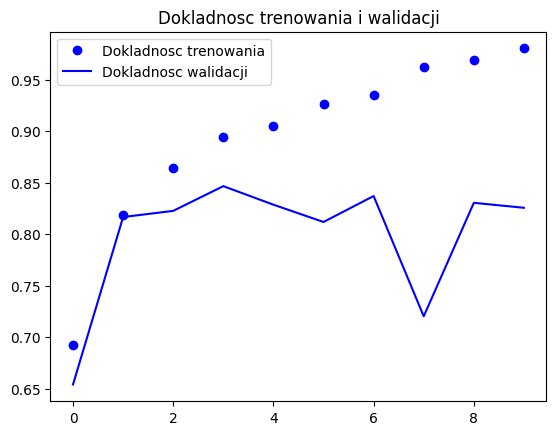

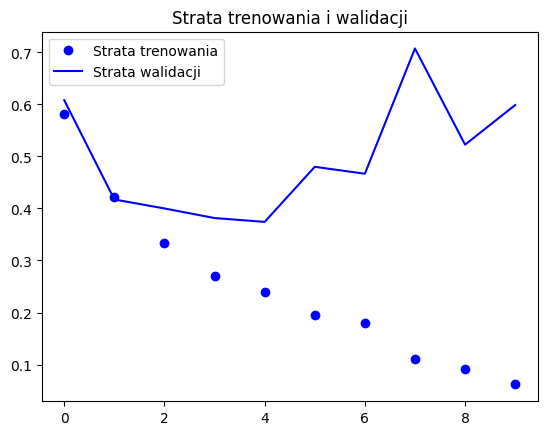

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

Pierwsze maksymalnie uproszczone rozwiązanie, doprowadzić może do uzyskania dokładności testowej na poziomie 88%. Niestety ta mała rekurencyjna sieć działa o wiele słabiej od wspomnianego rozwiązania (uzyskujemy dokładność walidacyjną na poziomie zaledwie 85%). Problem ten wynika częściowo z tego, że nie przetwarzamy pełnych sekwencji, a tylko 500 pierwszych słów, a więc sieć rekurencyjna ma dostęp do mniejszej ilości informacji niż model wcześniej omówione. Ponadto warstwa SimpleRNN nie sprawdza się najlepiej podczas przetwarzania długich sekwencji takich jak tekst. W takiej sytuacji lepiej sprawdzają się inne warstwy rekurencyjne. Przyjrzyjmy się bardziej zaawansowanym warstwom tego typu.

[...]

## Przykład warstwy LSTM zaimplementowanej w pakiecie Keras

Czas przyjrzeć się praktycznemu przykładowi zastosowania warstwy LSTM. Skonfigurujemy model, w którym znajdzie się taka warstwa, i wytrenujemy go na zbiorze danych IMDB. Przypomina on zaprezentowany wcześniej model z warstwą SimpleRNN. Określimy tylko liczbę wymiarów obiektu wyjściowego warstwy LSTM. Pozostałe argumenty tej warstwy (jest ich wiele) pozostawimy przy wartościach domyślnych. Ustawienia domyślne pakietu Keras są przemyślane i zwykle „po prostu działają” bez konieczności poświęcania dużej ilości czasu na ręczne dostrajanie parametrów.

In [16]:
from keras.layers import LSTM

model = Sequential()
model.add(Input(shape=(max_features,)))
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 176ms/step - acc: 0.5630 - loss: 0.6752 - val_acc: 0.6514 - val_loss: 0.6417
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 175ms/step - acc: 0.7986 - loss: 0.4377 - val_acc: 0.6308 - val_loss: 0.7125
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - acc: 0.8463 - loss: 0.3634 - val_acc: 0.8444 - val_loss: 0.3560
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - acc: 0.8833 - loss: 0.2977 - val_acc: 0.8734 - val_loss: 0.3076
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - acc: 0.8936 - loss: 0.2652 - val_acc: 0.8226 - val_loss: 0.3924
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - acc: 0.8957 - loss: 0.2610 - val_acc: 0.8634 - val_loss: 0.3861
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 176ms/step - acc: 0.9135 - loss: 0.2345 - val_acc: 0.8482 - val_loss: 0.3679
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 175ms/step - acc: 0.9141 - loss: 0.2196 - val_acc: 0.8628 - val_loss: 0.3335
Epoch 9/10
157/157 ━━━━━━━━━━━━━

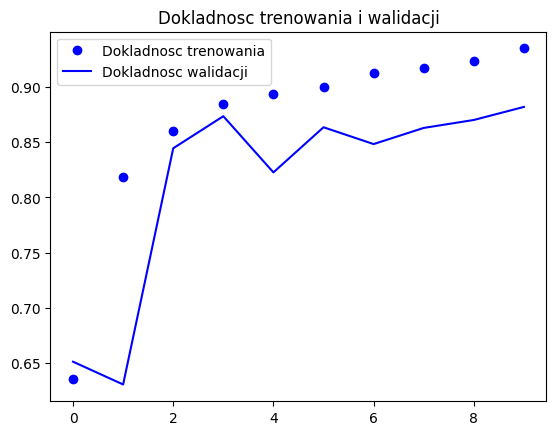

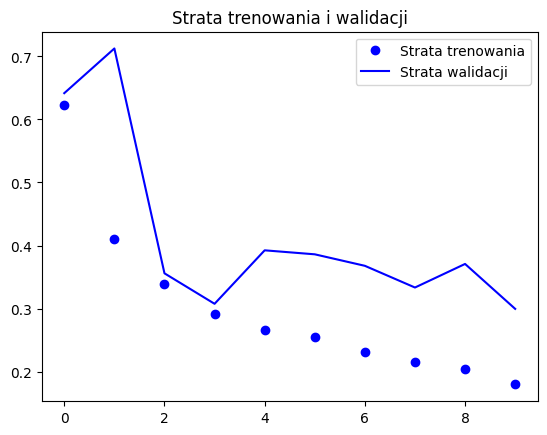

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()